In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:

dataset_path = 'movies.csv'

df = pd.read_csv(dataset_path)

df.describe()


,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


# DATA CLEANING AND PRE PROCESSING

In [4]:
# Number of rows and columns in the original raw dataset

num_rows, num_columns = df.shape


print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 9999
Number of columns: 9


In [5]:
# Dataset cleanning method - 1
# Removing duplicate values

df = df.drop_duplicates()

df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [6]:
# Number of rows and columns after dropping duplicate values
num_rows, num_columns = df.shape


print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 9568
Number of columns: 9


In [7]:
column_data_types = df.dtypes

# Display the data type of each column
print("Data type of each column:")
print(column_data_types)

Data type of each column:
MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES        object
RunTime     float64
Gross        object
dtype: object


In [8]:
num_rows, num_columns = df.shape


print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 9568
Number of columns: 9


In [9]:
# DATA CLEANNIG PROCESS - 2
# CONVERTING ALL THE VARIOUS TYPES OF DATA INTO A SINGLE TYPE

df['VOTES'] = df['VOTES'].str.replace(',', '').astype(float)

In [10]:
column_data_types = df.dtypes

# Display the data type of each column
print("Data type of each column:")
print(column_data_types)

Data type of each column:
MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES       float64
RunTime     float64
Gross        object
dtype: object


In [11]:
 # Data cleaning process - 3
# removing null values

# We find the number of columns with the common null values and remove them to not skew the data instead of filling it up all three values
# with some filler.

nan_counts = df.isna().sum()


print("Number of NaN values per column:")
print(nan_counts)

Number of NaN values per column:
MOVIES         0
YEAR         542
GENRE         78
RATING      1400
ONE-LINE       0
STARS          0
VOTES       1400
RunTime     2560
Gross       9108
dtype: int64


In [12]:
columns_with_missing = ['RATING', 'VOTES', 'RunTime']
# 'YEAR', 'GENRE',

# Filtering the rows with missing values for any of the specified columns
rows_to_drop = df[df[columns_with_missing].isnull().all(axis=1)]


num_rows_missing = len(rows_to_drop)
print(f"Number of rows with missing values for specified columns: {num_rows_missing}")

Number of rows with missing values for specified columns: 1178


In [13]:
df = df.drop(rows_to_drop.index)

num_rows_missing = len(rows_to_drop)

In [14]:
nan_counts = df.isna().sum()


print("Number of NaN values per column:")
print(nan_counts)

Number of NaN values per column:
MOVIES         0
YEAR          21
GENRE         13
RATING       222
ONE-LINE       0
STARS          0
VOTES        222
RunTime     1382
Gross       7930
dtype: int64


In [15]:
num_rows, num_columns = df.shape


print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 8390
Number of columns: 9


In [16]:
 # Data cleaning process - 4
# Filling in the data with other measures

# if we wanted to drop the rows with null values we are losing the majority of the rows so we are filling the
# null values with the median value of the entire column

df = df.dropna(subset=['GENRE'])

df['RATING'].fillna(df['RATING'].median(), inplace=True)
df['VOTES'].fillna(df['VOTES'].mean(), inplace=True)
df['RunTime'].fillna(df['RunTime'].median(), inplace=True)

df.head()

<ipython-input-16-e1358c782600>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RATING'].fillna(df['RATING'].median(), inplace=True)
<ipython-input-16-e1358c782600>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VOTES'].fillna(df['VOTES'].mean(), inplace=True)
<ipython-input-16-e1358c782600>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RunTime'].fillna(df['RunTime'].median(), inplace=True)


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,21062.0,121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...",17870.0,25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",885805.0,44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...",414849.0,23.0,NaN
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...",25858.0,50.0,NaN


In [17]:
# Data cleaning method - 5
# Setting all the numeric characters to the same precision to avoid inconsistency

desired_precision = 2

pd.set_option('display.float_format', lambda x: f'{x:.{desired_precision}f}')

df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.10,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,21062.00,121.00,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.00,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...",17870.00,25.00,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.20,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",885805.00,44.00,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.20,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...",414849.00,23.00,NaN
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.60,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...",25858.00,50.00,NaN


In [18]:
# Data cleaning method - 6

# Converting all text data into lowercase data.

df['MOVIES'] = df['MOVIES'].str.lower()
df['GENRE'] = df['GENRE'].str.lower()
df['ONE-LINE'] = df['ONE-LINE'].str.lower()
df['STARS'] = df['STARS'].str.lower()

df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,blood red sky,(2021),"\naction, horror, thriller",6.10,\na woman with a mysterious illness is forced ...,\n director:\npeter thorwarth\n| \n star...,21062.00,121.00,NaN
1,masters of the universe: revelation,(2021– ),"\nanimation, action, adventure",5.00,\nthe war for eternia begins again in what may...,"\n \n stars:\nchris wood, \nsara...",17870.00,25.00,NaN
2,the walking dead,(2010–2022),"\ndrama, horror, thriller",8.20,\nsheriff deputy rick grimes wakes up from a c...,"\n \n stars:\nandrew lincoln, \n...",885805.00,44.00,NaN
3,rick and morty,(2013– ),"\nanimation, adventure, comedy",9.20,\nan animated series that follows the exploits...,"\n \n stars:\njustin roiland, \n...",414849.00,23.00,NaN
5,outer banks,(2020– ),"\naction, crime, drama",7.60,\na group of teenagers from the wrong side of ...,"\n \n stars:\nchase stokes, \nma...",25858.00,50.00,NaN


In [19]:
num_rows, num_columns = df.shape


print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 8377
Number of columns: 9


In [20]:
# Identify and select only the numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate quantiles and IQR for numeric columns only
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers based on IQR for numeric columns
df = df[~((df[numeric_cols] < (Q1 - 3 * IQR)) | (df[numeric_cols] > (Q3 + 3 * IQR))).any(axis=1)]
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
6,the last letter from your lover,(2021),"\ndrama, romance",6.80,\na pair of interwoven stories set in the past...,\n director:\naugustine frizzell\n| \n s...,5283.00,110.00,NaN
13,sex/life,(2021– ),"\ncomedy, drama, romance",5.40,\na suburban mother of two takes a fantasy-cha...,"\n \n stars:\nsarah shahi, \nmik...",12172.00,60.00,NaN
25,chernobyl,(2021),"\ndrama, history, romance",5.00,\na story about a heroic fireman who worked as...,\n director:\ndanila kozlovskiy\n| \n st...,4681.00,136.00,NaN
63,le dernier mercenaire,(2021),"\naction, comedy",5.40,\na mysterious former secret service agent mus...,\n director:\ndavid charhon\n| \n stars:...,2606.00,110.00,NaN
64,resort to love,(2021),"\ncomedy, romance",5.70,"\nerica, who ends up as the entertainment at h...",\n director:\nsteven k. tsuchida\n| \n s...,1591.00,101.00,NaN


In [21]:
# Number of rows and columns left after removing outliers using the inter quartile range

num_rows, num_columns = df.shape


print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 7403
Number of columns: 9


In [22]:
# data cleaning process - 8
# Removing the trailing whitespaces in the text data to avoid and inconsistencies.

df['MOVIES'] = df['MOVIES'].str.strip()
df['GENRE'] = df['GENRE'].str.strip()
df['ONE-LINE'] = df['ONE-LINE'].str.strip()
df['STARS'] = df['STARS'].str.strip()

df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
6,the last letter from your lover,(2021),"drama, romance",6.80,a pair of interwoven stories set in the past a...,director:\naugustine frizzell\n| \n stars:\...,5283.00,110.00,NaN
13,sex/life,(2021– ),"comedy, drama, romance",5.40,a suburban mother of two takes a fantasy-charg...,"stars:\nsarah shahi, \nmike vogel, \nadam demo...",12172.00,60.00,NaN
25,chernobyl,(2021),"drama, history, romance",5.00,a story about a heroic fireman who worked as o...,director:\ndanila kozlovskiy\n| \n stars:\n...,4681.00,136.00,NaN
63,le dernier mercenaire,(2021),"action, comedy",5.40,a mysterious former secret service agent must ...,director:\ndavid charhon\n| \n stars:\njean...,2606.00,110.00,NaN
64,resort to love,(2021),"comedy, romance",5.70,"erica, who ends up as the entertainment at her...",director:\nsteven k. tsuchida\n| \n stars:\...,1591.00,101.00,NaN


In [23]:
# Data cleaning and pre processing - 9
# removing the punctuation and special charaters

import re

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

df['MOVIES'] = df['MOVIES'].apply(remove_special_characters)
df['GENRE'] = df['GENRE'].apply(remove_special_characters)
df['ONE-LINE'] = df['ONE-LINE'].apply(remove_special_characters)
df['STARS'] = df['STARS'].apply(remove_special_characters)

df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
6,the last letter from your lover,(2021),drama romance,6.80,a pair of interwoven stories set in the past a...,director\naugustine frizzell\n \n stars\nsh...,5283.00,110.00,NaN
13,sexlife,(2021– ),comedy drama romance,5.40,a suburban mother of two takes a fantasycharge...,stars\nsarah shahi \nmike vogel \nadam demos \...,12172.00,60.00,NaN
25,chernobyl,(2021),drama history romance,5.00,a story about a heroic fireman who worked as o...,director\ndanila kozlovskiy\n \n stars\ndan...,4681.00,136.00,NaN
63,le dernier mercenaire,(2021),action comedy,5.40,a mysterious former secret service agent must ...,director\ndavid charhon\n \n stars\njeancla...,2606.00,110.00,NaN
64,resort to love,(2021),comedy romance,5.70,erica who ends up as the entertainment at her ...,director\nsteven k tsuchida\n \n stars\nchr...,1591.00,101.00,NaN


In [24]:
# Data cleaning process - 10
# Removing numbers from our text data columns

df['MOVIES'] = df['MOVIES'].apply(lambda x: re.sub(r'\d+', '', x))
df['GENRE'] = df['GENRE'].apply(lambda x: re.sub(r'\d+', '', x))
df['ONE-LINE'] = df['ONE-LINE'].apply(lambda x: re.sub(r'\d+', '', x))
df['STARS'] = df['STARS'].apply(lambda x: re.sub(r'\d+', '', x))

df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
6,the last letter from your lover,(2021),drama romance,6.80,a pair of interwoven stories set in the past a...,director\naugustine frizzell\n \n stars\nsh...,5283.00,110.00,NaN
13,sexlife,(2021– ),comedy drama romance,5.40,a suburban mother of two takes a fantasycharge...,stars\nsarah shahi \nmike vogel \nadam demos \...,12172.00,60.00,NaN
25,chernobyl,(2021),drama history romance,5.00,a story about a heroic fireman who worked as o...,director\ndanila kozlovskiy\n \n stars\ndan...,4681.00,136.00,NaN
63,le dernier mercenaire,(2021),action comedy,5.40,a mysterious former secret service agent must ...,director\ndavid charhon\n \n stars\njeancla...,2606.00,110.00,NaN
64,resort to love,(2021),comedy romance,5.70,erica who ends up as the entertainment at her ...,director\nsteven k tsuchida\n \n stars\nchr...,1591.00,101.00,NaN


In [25]:
# DATA CLEANING METHOD - 11
# Removing the extra white spaces for consistency

df['MOVIES'] = df['MOVIES'].apply(lambda x: ' '.join(x.split()))
df['GENRE'] = df['GENRE'].apply(lambda x: ' '.join(x.split()))
df['ONE-LINE'] = df['ONE-LINE'].apply(lambda x: ' '.join(x.split()))
df['STARS'] = df['STARS'].apply(lambda x: ' '.join(x.split()))
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
6,the last letter from your lover,(2021),drama romance,6.80,a pair of interwoven stories set in the past a...,director augustine frizzell stars shailene woo...,5283.00,110.00,NaN
13,sexlife,(2021– ),comedy drama romance,5.40,a suburban mother of two takes a fantasycharge...,stars sarah shahi mike vogel adam demos margar...,12172.00,60.00,NaN
25,chernobyl,(2021),drama history romance,5.00,a story about a heroic fireman who worked as o...,director danila kozlovskiy stars danila kozlov...,4681.00,136.00,NaN
63,le dernier mercenaire,(2021),action comedy,5.40,a mysterious former secret service agent must ...,director david charhon stars jeanclaude van da...,2606.00,110.00,NaN
64,resort to love,(2021),comedy romance,5.70,erica who ends up as the entertainment at her ...,director steven k tsuchida stars christina mil...,1591.00,101.00,NaN


In [26]:
# DATA CLEANING METHODS - 12
# REMOVING EMOTICONS AND EMOJIS TO AVOID DATA INTERRUPTION

def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)



df['MOVIES'] = df['MOVIES'].apply(remove_emojis)
df['GENRE'] = df['GENRE'].apply(remove_emojis)
df['ONE-LINE'] = df['ONE-LINE'].apply(remove_emojis)
df['STARS'] = df['STARS'].apply(remove_emojis)

df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
6,the last letter from your lover,(2021),drama romance,6.80,a pair of interwoven stories set in the past a...,director augustine frizzell stars shailene woo...,5283.00,110.00,NaN
13,sexlife,(2021– ),comedy drama romance,5.40,a suburban mother of two takes a fantasycharge...,stars sarah shahi mike vogel adam demos margar...,12172.00,60.00,NaN
25,chernobyl,(2021),drama history romance,5.00,a story about a heroic fireman who worked as o...,director danila kozlovskiy stars danila kozlov...,4681.00,136.00,NaN
63,le dernier mercenaire,(2021),action comedy,5.40,a mysterious former secret service agent must ...,director david charhon stars jeanclaude van da...,2606.00,110.00,NaN
64,resort to love,(2021),comedy romance,5.70,erica who ends up as the entertainment at her ...,director steven k tsuchida stars christina mil...,1591.00,101.00,NaN


In [27]:
# Data cleaning method - 13
# expanding the contractions to avoid data inconsistencies


!pip install contractions
import contractions

df['MOVIES'] = df['MOVIES'].apply(contractions.fix)
df['GENRE'] = df['GENRE'].apply(contractions.fix)
df['ONE-LINE'] = df['ONE-LINE'].apply(contractions.fix)
df['STARS'] = df['STARS'].apply(contractions.fix)


df.head()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 14.0 MB/s eta 0:00:00


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
6,the last letter from your lover,(2021),drama romance,6.80,a pair of interwoven stories set in the past a...,director augustine frizzell stars shailene woo...,5283.00,110.00,NaN
13,sexlife,(2021– ),comedy drama romance,5.40,a suburban mother of two takes a fantasycharge...,stars sarah shahi mike vogel adam demos margar...,12172.00,60.00,NaN
25,chernobyl,(2021),drama history romance,5.00,a story about a heroic fireman who worked as o...,director danila kozlovskiy stars danila kozlov...,4681.00,136.00,NaN
63,le dernier mercenaire,(2021),action comedy,5.40,a mysterious former secret service agent must ...,director david charhon stars jeanclaude van da...,2606.00,110.00,NaN
64,resort to love,(2021),comedy romance,5.70,erica who ends up as the entertainment at her ...,director steven k tsuchida stars christina mil...,1591.00,101.00,NaN


In [28]:
# Data cleaning process - 14
# Breaking the words into individual values else called tokenization but manually

df['GENRE'] = df['GENRE'].str.split()

print(df['GENRE'])

6                     [drama, romance]
13            [comedy, drama, romance]
25           [drama, history, romance]
63                    [action, comedy]
64                   [comedy, romance]
                     ...              
9961                   [comedy, drama]
9962                   [comedy, drama]
9963    [animation, action, adventure]
9976                        [talkshow]
9979                          [comedy]
Name: GENRE, Length: 7403, dtype: object


# data explatory analysis

In [29]:
# Displaying the summary statistics

summary = df.describe()
print("Summary of the dataset:")
print(summary)

Summary of the dataset:
       RATING    VOTES  RunTime
count 7403.00  7403.00  7403.00
mean     6.90  2287.61    62.40
std      1.21  3801.04    31.31
min      1.80     5.00     1.00
25%      6.20   143.00    41.00
50%      7.10   618.00    60.00
75%      7.70  2426.50    86.00
max      9.90 17040.00   233.00


In [30]:
# Calculating the mode for each column

modes = df.mode()
print("\nMode:")
print(modes)


Mode:
          MOVIES      YEAR     GENRE  RATING    ONE-LINE STARS    VOTES  \
0  bleach burchi  (2020– )  [comedy]    7.10  add a plot       15164.72   

   RunTime   Gross  
0    60.00  $0.01M  


In [32]:
# Identify and select only the numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculating the skewness for numeric columns
skewness = df[numeric_cols].skew()
print("\nSkewness:\n")
print(skewness)


Skewness:

RATING    -0.72
VOTES      2.32
RunTime    0.83
dtype: float64


In [34]:
# Calculating the kurtosis for each column

kurtosis = df[numeric_cols].kurtosis()
print("\nKurtosis:\n")
print(kurtosis)


Kurtosis:

RATING    0.66
VOTES     4.65
RunTime   1.37
dtype: float64


In [36]:
# Identify and select only the numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate z-scores for numeric columns
z_scores = (df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std()

# Identify outliers
outliers = df[numeric_cols][(z_scores > 3) | (z_scores < -3)].dropna()
print("\nOutliers:\n")
print(outliers)


Outliers:

Empty DataFrame
Columns: [RATING, VOTES, RunTime]
Index: []


In [37]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
6,the last letter from your lover,(2021),"[drama, romance]",6.80,a pair of interwoven stories set in the past a...,director augustine frizzell stars shailene woo...,5283.00,110.00,NaN
13,sexlife,(2021– ),"[comedy, drama, romance]",5.40,a suburban mother of two takes a fantasycharge...,stars sarah shahi mike vogel adam demos margar...,12172.00,60.00,NaN
25,chernobyl,(2021),"[drama, history, romance]",5.00,a story about a heroic fireman who worked as o...,director danila kozlovskiy stars danila kozlov...,4681.00,136.00,NaN
63,le dernier mercenaire,(2021),"[action, comedy]",5.40,a mysterious former secret service agent must ...,director david charhon stars jeanclaude van da...,2606.00,110.00,NaN
64,resort to love,(2021),"[comedy, romance]",5.70,erica who ends up as the entertainment at her ...,director steven k tsuchida stars christina mil...,1591.00,101.00,NaN


In [38]:
# Number of rows and columns left after removing outliers using z- score

# No change as the outliers have already been filtered by the Interquartile filtering

num_rows, num_columns = df.shape


print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 7403
Number of columns: 9


In [40]:
# Identify and select only the numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculating the variance for numeric columns
variance = df[numeric_cols].var()
print("Variance:")
print(variance)
print("\n")

Variance:
RATING           1.47
VOTES     14447872.07
RunTime        980.47
dtype: float64




In [41]:
# Calculating the standard deviation for each column

std_deviation = df[numeric_cols].std()
print("\nStandard Deviation:")
print(std_deviation)
print("\n")


Standard Deviation:
RATING       1.21
VOTES     3801.04
RunTime     31.31
dtype: float64




In [45]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df = df[~((df[numeric_cols] < (Q1 - 3 * IQR)) | (df[numeric_cols] > (Q3 + 3 * IQR))).any(axis=1)]

RATING       1.50
VOTES     1348.50
RunTime     42.00
dtype: float64


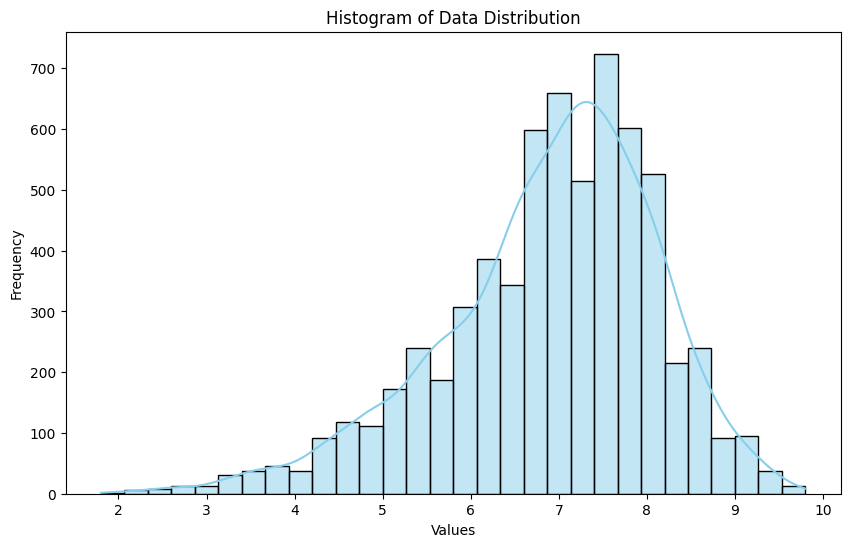

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(df['RATING'], kde=True, color='skyblue', bins=30)
plt.title('Histogram of Data Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

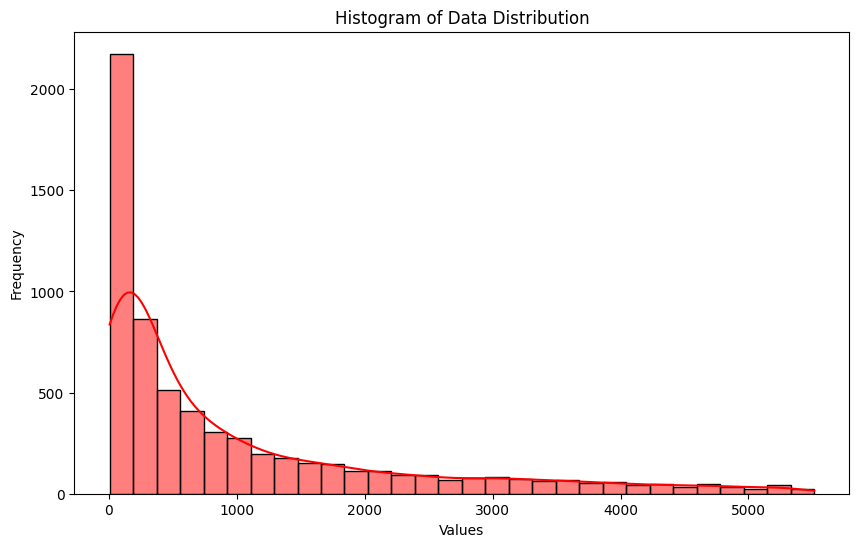

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df['VOTES'], kde=True, color='red', bins=30)
plt.title('Histogram of Data Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

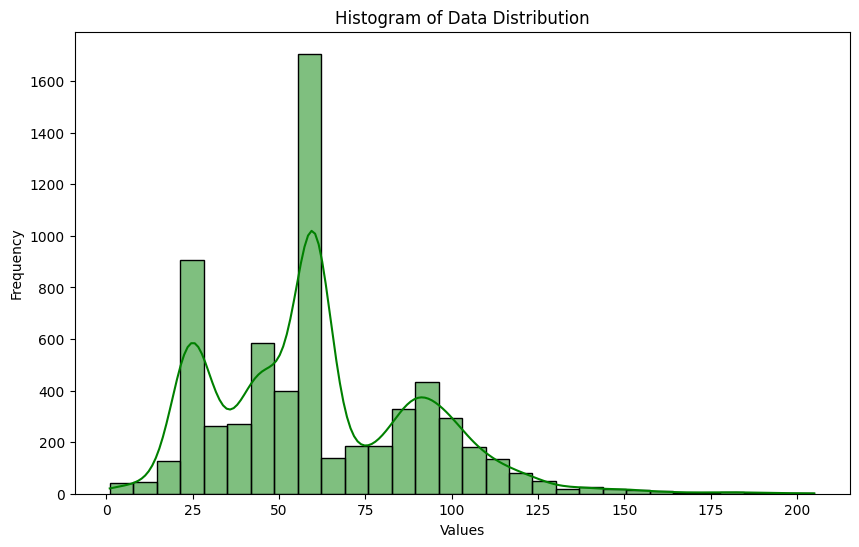

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(df['RunTime'], kde=True, color='green', bins=30)
plt.title('Histogram of Data Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

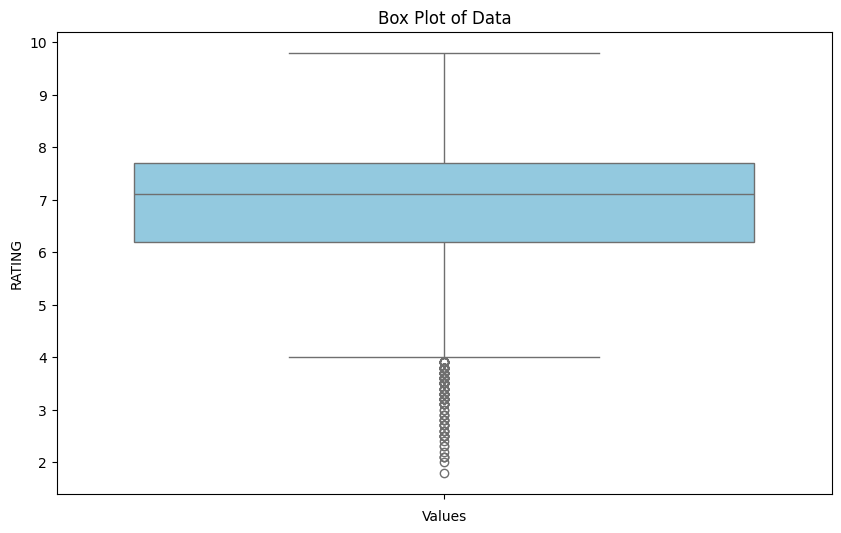

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['RATING'], color='skyblue')
plt.title('Box Plot of Data')
plt.xlabel('Values')
plt.show()

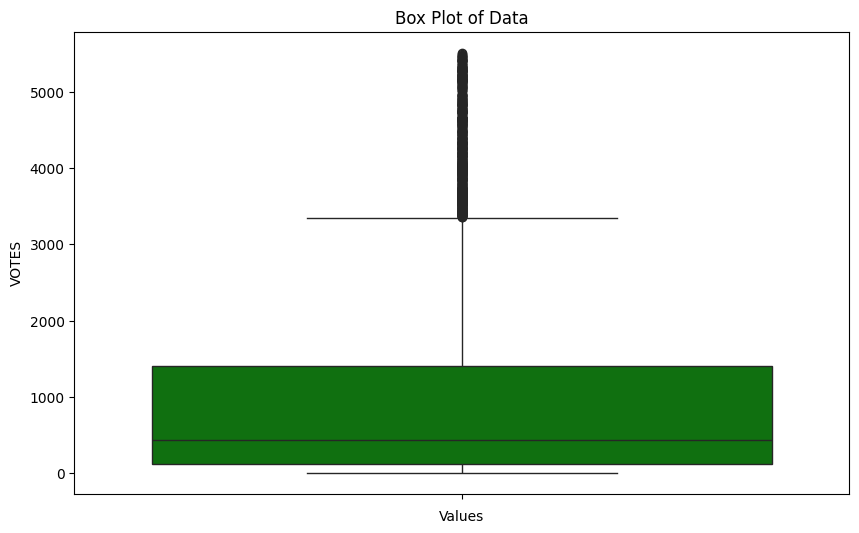

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['VOTES'], color='green')
plt.title('Box Plot of Data')
plt.xlabel('Values')
plt.show()

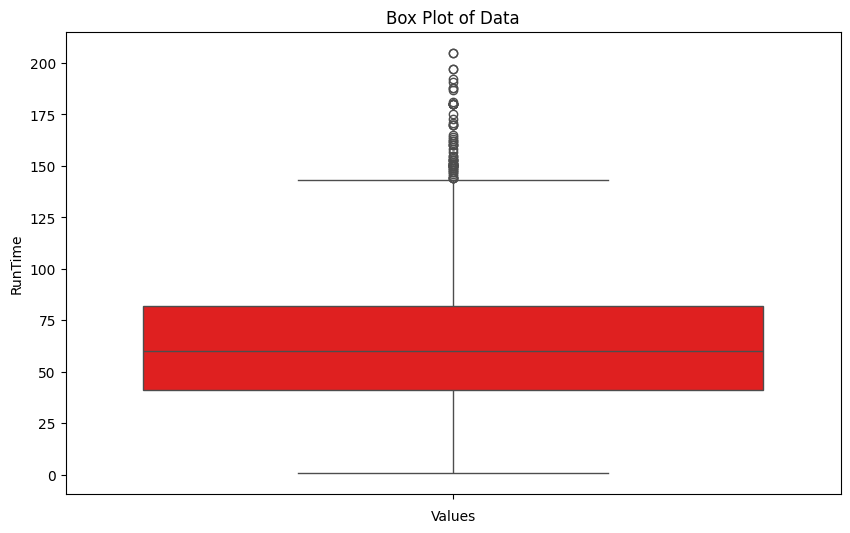

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['RunTime'], color='red')
plt.title('Box Plot of Data')
plt.xlabel('Values')
plt.show()

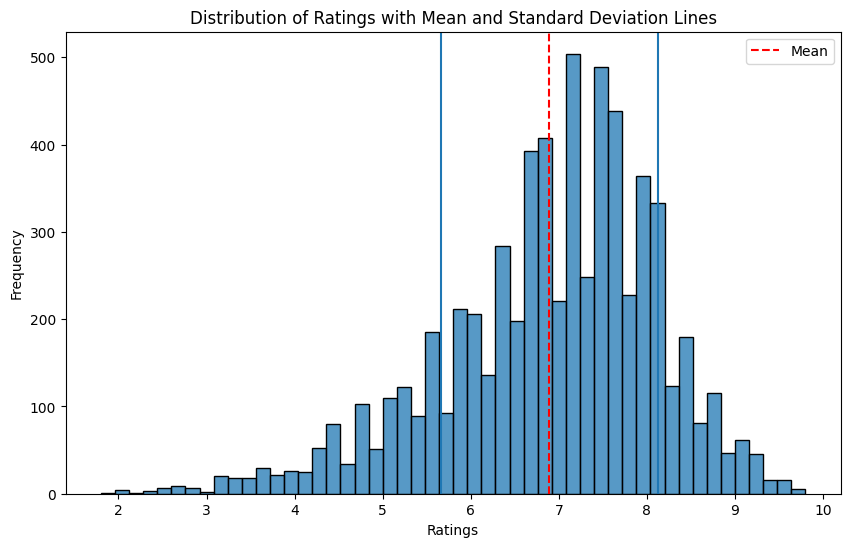

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(df['RATING'])
plt.axvline(df['RATING'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['RATING'].mean() + df['RATING'].std())
plt.axvline(df['RATING'].mean() - df['RATING'].std())
plt.legend()
plt.title('Distribution of Ratings with Mean and Standard Deviation Lines')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

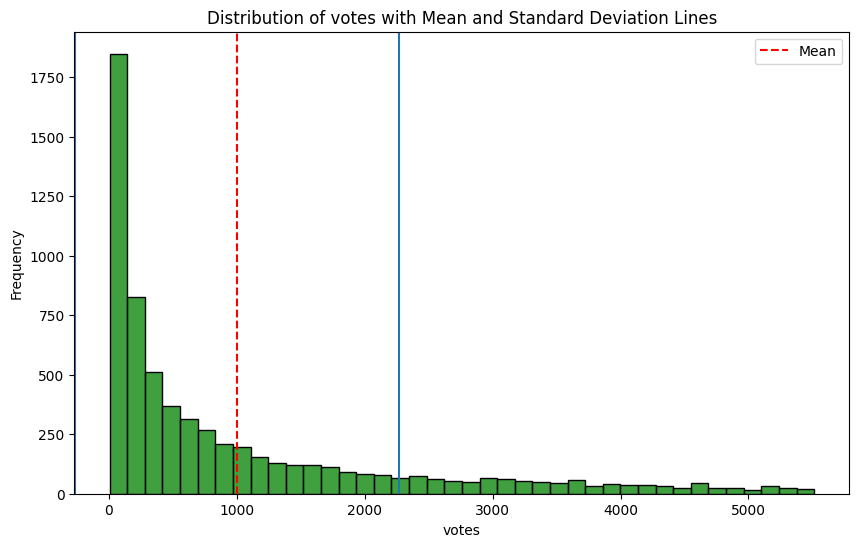

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(df['VOTES'],color='green')
plt.axvline(df['VOTES'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['VOTES'].mean() + df['VOTES'].std())
plt.axvline(df['VOTES'].mean() - df['VOTES'].std())
plt.legend()
plt.title('Distribution of votes with Mean and Standard Deviation Lines')
plt.xlabel('votes')
plt.ylabel('Frequency')
plt.show()

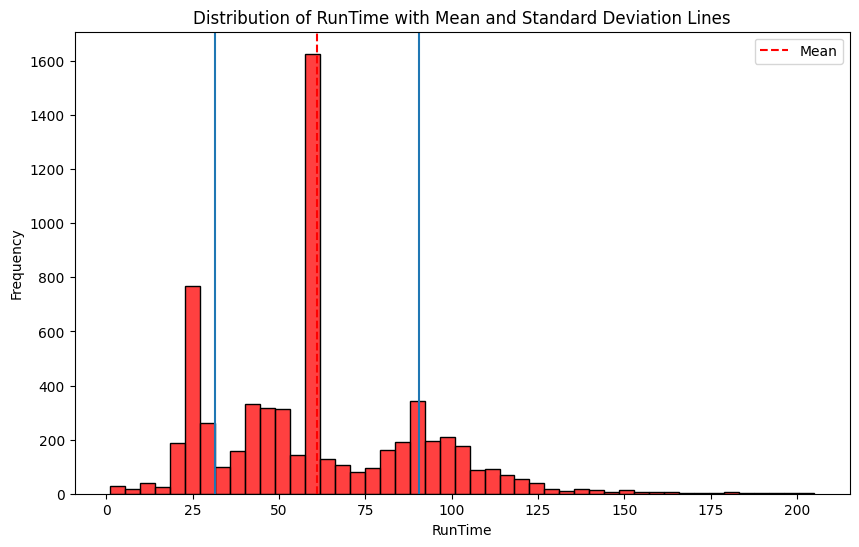

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(df['RunTime'],color='red')
plt.axvline(df['RunTime'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['RunTime'].mean() + df['RunTime'].std())
plt.axvline(df['RunTime'].mean() - df['RunTime'].std())
plt.legend()
plt.title('Distribution of RunTime with Mean and Standard Deviation Lines')
plt.xlabel('RunTime')
plt.ylabel('Frequency')
plt.show()

## Exploratory Data Analysis

In [55]:
# 1. Understanding the Structure of the Data
print(df.head())
print(df.info())

                             MOVIES      YEAR                      GENRE  \
6   the last letter from your lover    (2021)           [drama, romance]   
25                        chernobyl    (2021)  [drama, history, romance]   
63            le dernier mercenaire    (2021)           [action, comedy]   
64                   resort to love    (2021)          [comedy, romance]   
74                  feels like ishq  (2021– )   [comedy, drama, romance]   

    RATING                                           ONE-LINE  \
6     6.80  a pair of interwoven stories set in the past a...   
25    5.00  a story about a heroic fireman who worked as o...   
63    5.40  a mysterious former secret service agent must ...   
64    5.70  erica who ends up as the entertainment at her ...   
74    6.60  short films follow young adults as they naviga...   

                                                STARS   VOTES  RunTime Gross  
6   director augustine frizzell stars shailene woo... 5283.00   110.00   

In [56]:
# 2. Summary Statistics
df.describe()

,RATING,VOTES,RunTime
count,6461.00,6461.00,6461.00
mean,6.89,1001.76,61.03
std,1.23,1264.49,29.42
min,1.80,5.00,1.00
25%,6.20,118.00,41.00
50%,7.10,434.00,60.00
75%,7.70,1411.00,82.00
max,9.80,5514.00,205.00


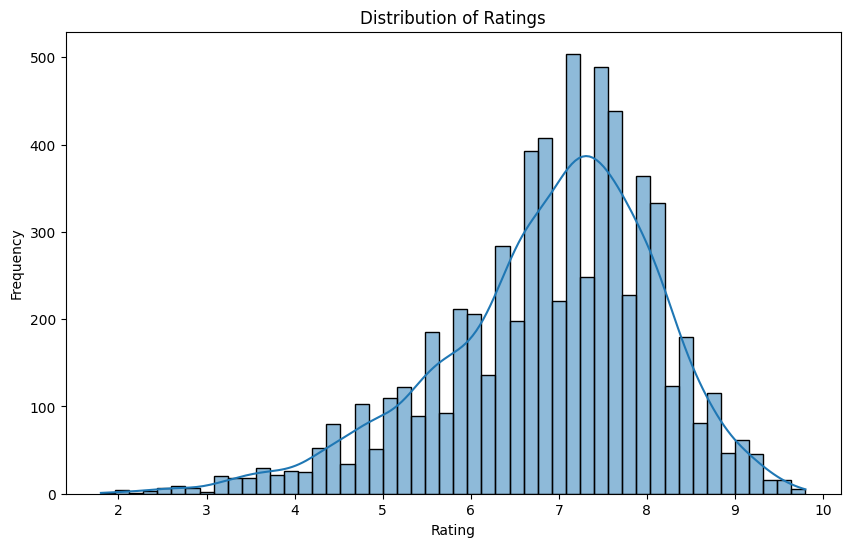

In [57]:
# 3. Visualizing the Data
# Histogram of 'RATING'
plt.figure(figsize=(10, 6))
sns.histplot(df['RATING'], kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

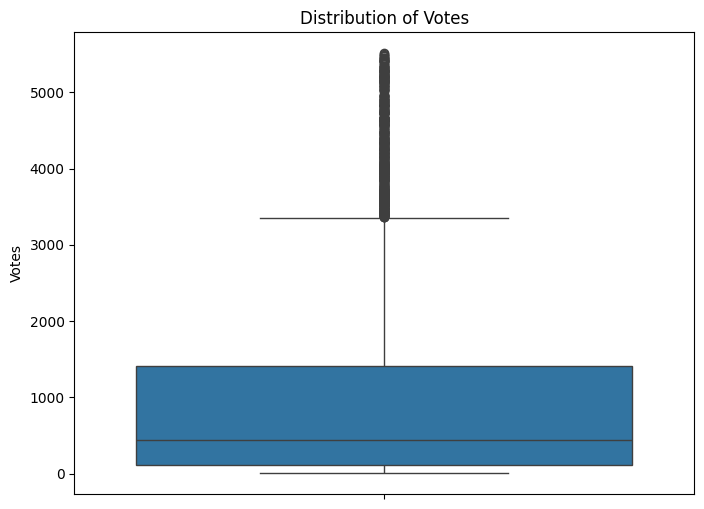

In [58]:
# 4. Outlier Detection
# Box plot of 'VOTES'
plt.figure(figsize=(8, 6))
sns.boxplot(y='VOTES', data=df)
plt.title('Distribution of Votes')
plt.ylabel('Votes')
plt.show()

In [59]:
# 5. Feature Selection
# Selecting relevant features based on domain knowledge
selected_features = [ 'GENRE', 'RATING', 'STARS', 'VOTES', 'RunTime']
df_selected = df[selected_features]

In [60]:
# 6. Dropping Columns
# Dropping irrelevant columns
df = df.drop(columns=['Gross','MOVIES'])

In [61]:
# Feature Engineering: Creating a new feature 'Popularity' by multiplying 'VOTES' with 'RATING'
from sklearn.preprocessing import MinMaxScaler

df['Popularity'] = df['VOTES'] * df['RATING']

df['patience'] = df['RunTime'] * df['RATING']

df['likeliness'] = df['RunTime'] * df['VOTES']

scaler = MinMaxScaler(feature_range=(0, 100))
popularity_values = df['Popularity'].values.reshape(-1, 1)
df['Popularity_Scaled'] = scaler.fit_transform(popularity_values)
df.drop(columns=['Popularity'], inplace=True)

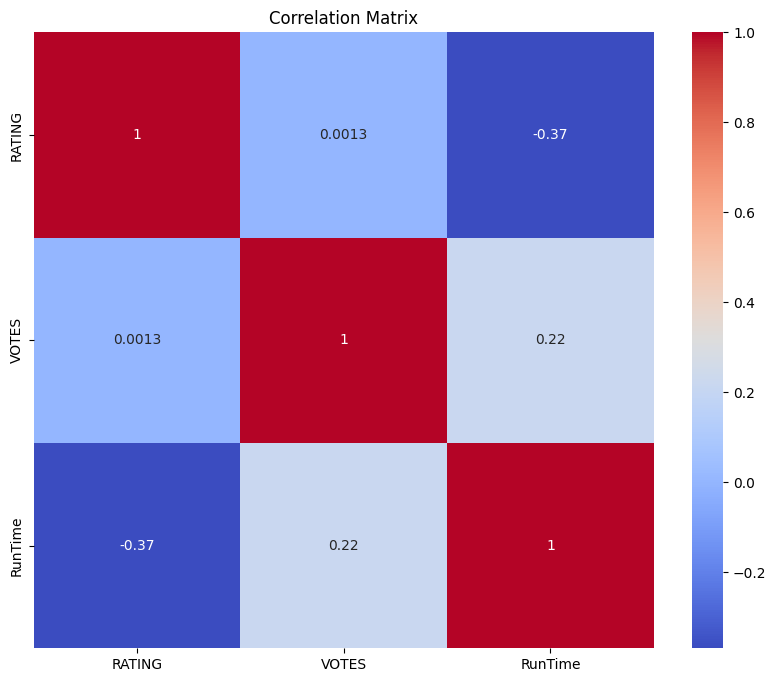

In [63]:
df_selected['GENRE'] = df_selected['GENRE'].apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else str(x))
numeric_cols = df_selected.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_selected[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [64]:
# 10. Hypothesis Testing
# Example: T-test to compare Ratings between movies with different genres
import pandas as pd
from scipy.stats import ttest_ind

action_movies = df[df['GENRE'].apply(lambda x: 'action' in x)]['RATING']
comedy_movies = df[df['GENRE'].apply(lambda x: 'comedy' in x)]['RATING']

# Perform t-test
t_stat, p_value = ttest_ind(action_movies.dropna(), comedy_movies.dropna())
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: 9.353573399168972, p-value: 1.5177149409209928e-20


In [65]:
action_movies = df[df['GENRE'].apply(lambda x: 'drama' in x)]['RATING']
comedy_movies = df[df['GENRE'].apply(lambda x: 'romance' in x)]['RATING']

# Perform t-test
t_stat, p_value = ttest_ind(action_movies.dropna(), comedy_movies.dropna())
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: 5.276926501299442, p-value: 1.4028124119017998e-07


In [66]:
action_movies = df[df['GENRE'].apply(lambda x: 'drama' in x)]['RATING']
comedy_movies = df[df['GENRE'].apply(lambda x: 'action' in x)]['RATING']

# Perform t-test
t_stat, p_value = ttest_ind(action_movies.dropna(), comedy_movies.dropna())
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: -3.450758141972657, p-value: 0.0005648825652845758


In [67]:
action_movies = df[df['GENRE'].apply(lambda x: 'action' in x)]['RATING']
comedy_movies = df[df['GENRE'].apply(lambda x: 'history' in x)]['RATING']
# Perform t-test
t_stat, p_value = ttest_ind(action_movies.dropna(), comedy_movies.dropna())
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: -1.0444729417722196, p-value: 0.2964265033446632


In [68]:
action_movies = df[df['GENRE'].apply(lambda x: 'comedy' in x)]['RATING']
comedy_movies = df[df['GENRE'].apply(lambda x: 'history' in x)]['RATING']

# Perform t-test
t_stat, p_value = ttest_ind(action_movies.dropna(), comedy_movies.dropna())
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: -5.621045983259312, p-value: 2.1512376945262443e-08


In [69]:
action_movies = df[df['GENRE'].apply(lambda x: 'drama' in x)]['RATING']
comedy_movies = df[df['GENRE'].apply(lambda x: 'history' in x)]['RATING']

# Perform t-test
t_stat, p_value = ttest_ind(action_movies.dropna(), comedy_movies.dropna())
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: -2.871163474296224, p-value: 0.004121029271633968


In [70]:
df.head()

,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,patience,likeliness,Popularity_Scaled
6,(2021),"[drama, romance]",6.80,a pair of interwoven stories set in the past a...,director augustine frizzell stars shailene woo...,5283.00,110.00,748.00,581130.00,69.38
25,(2021),"[drama, history, romance]",5.00,a story about a heroic fireman who worked as o...,director danila kozlovskiy stars danila kozlov...,4681.00,136.00,680.00,636616.00,45.19
63,(2021),"[action, comedy]",5.40,a mysterious former secret service agent must ...,director david charhon stars jeanclaude van da...,2606.00,110.00,594.00,286660.00,27.16
64,(2021),"[comedy, romance]",5.70,erica who ends up as the entertainment at her ...,director steven k tsuchida stars christina mil...,1591.00,101.00,575.70,160691.00,17.49
74,(2021– ),"[comedy, drama, romance]",6.60,short films follow young adults as they naviga...,stars jojo singh mihir ahuja kajol chugh sumal...,848.00,32.00,211.20,27136.00,10.78


#**Phase - 2 ML Algorithms and Analysis old text**

## pre - processing

In [ ]:
# Converting the year column to a float for trend analysis

df['YEAR'] = df['YEAR'].str.extract(r'(\d{4})').astype(float)

In [ ]:
# As these custom columns were made from what we are trying to predict, we have removed them for now but will bring them back for trend analysis.
# Since they were created from RATING the models instantly catch on the the logic if we use these columns.

df = df.drop(columns=['Popularity_Scaled','patience','likeliness'])

In [ ]:
df.head()

,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
6,2021.00,"[drama, romance]",6.80,a pair of interwoven stories set in the past a...,director augustine frizzell stars shailene woo...,5283.00,110.00
13,2021.00,"[comedy, drama, romance]",5.40,a suburban mother of two takes a fantasycharge...,stars sarah shahi mike vogel adam demos margar...,12172.00,60.00
25,2021.00,"[drama, history, romance]",5.00,a story about a heroic fireman who worked as o...,director danila kozlovskiy stars danila kozlov...,4681.00,136.00
63,2021.00,"[action, comedy]",5.40,a mysterious former secret service agent must ...,director david charhon stars jeanclaude van da...,2606.00,110.00
64,2021.00,"[comedy, romance]",5.70,erica who ends up as the entertainment at her ...,director steven k tsuchida stars christina mil...,1591.00,101.00


### Splitting of the data into test, train and split and also using the RANDOM Forest Classifier on the data

Random Forest Classifier Evaluation:
Accuracy: 0.6576637407157326
[[497 168   6]
 [172 352  26]
 [ 35 100 125]]
Classification Report:
              precision    recall  f1-score   support

        Flop       0.57      0.64      0.60       550
     Average       0.71      0.74      0.72       671
         Hit       0.80      0.48      0.60       260

    accuracy                           0.66      1481
   macro avg       0.69      0.62      0.64      1481
weighted avg       0.67      0.66      0.66      1481



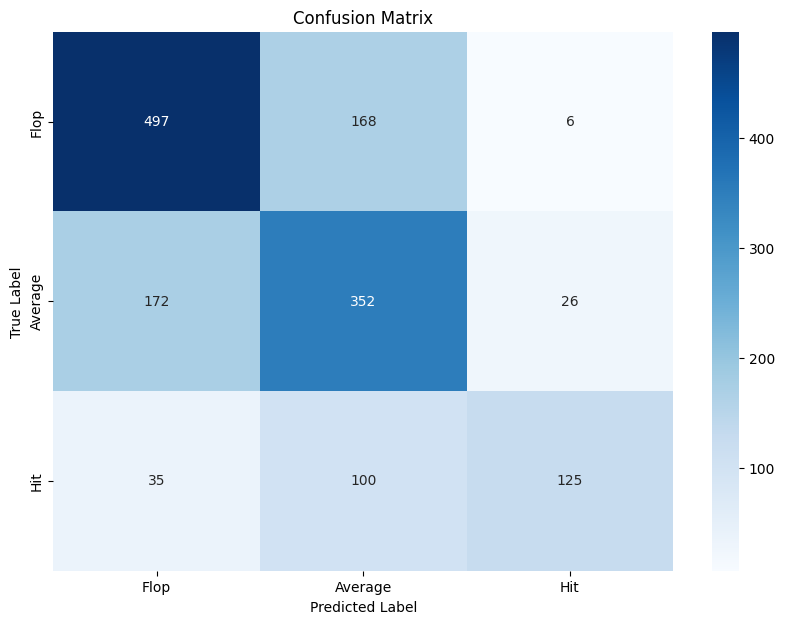

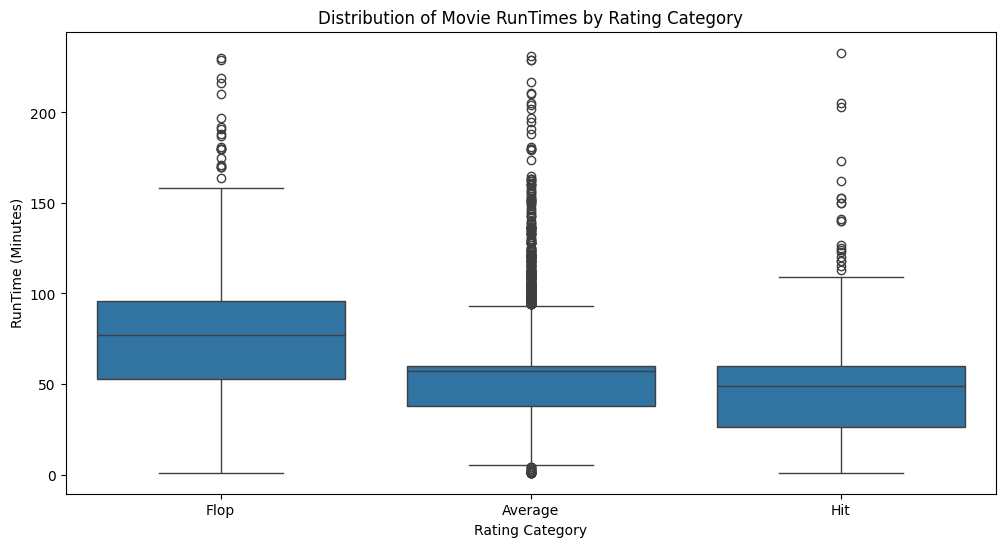

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier


#converting the genre from list to a string joined by a ','
df['GENRE'] = df['GENRE'].apply(lambda x: ','.join(x) if isinstance(x, list) else x)



# Function to map ratings to classes based on new criteria for which we base our classification upon.
def map_ratings_to_classes(rating):
    if rating <= 6:
        return 'Flop'
    elif rating <= 7.5:
      return 'Average'
    else:
        return 'Hit'

df2 = df.copy()

df['RATING'] =  np.floor(df['RATING']).astype(int)

df['RATING'] = df['RATING'].apply(map_ratings_to_classes)


X = df.drop('RATING', axis=1)
y = df['RATING']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['VOTES', 'RunTime', 'YEAR']
categorical_features = ['GENRE','ONE-LINE','STARS']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

rf_classifier_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))])


rf_classifier_pipeline.fit(X_train, y_train)


y_pred = rf_classifier_pipeline.predict(X_test)


print('Random Forest Classifier Evaluation:')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred, labels=['Flop','Average', 'Hit']))

print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['Flop','Average', 'Hit']))


conf_matrix = confusion_matrix(y_test, y_pred, labels=['Flop','Average', 'Hit'])
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Flop','Average', 'Hit'], yticklabels=['Flop','Average', 'Hit'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

df_vis = df.dropna(subset=['RunTime', 'RATING'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='RATING', y='RunTime', data=df_vis)
plt.title('Distribution of Movie RunTimes by Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('RunTime (Minutes)')
plt.show()

## Decision Tree Classifier on the data.

Accuracy: 0.6394328156650911
[[352 172  26]
 [168 497   6]
 [100  35 125]]
Decision Tree Classifier Metrics:
              precision    recall  f1-score   support

     Average       0.58      0.59      0.59       550
        Flop       0.71      0.71      0.71       671
         Hit       0.58      0.56      0.57       260

    accuracy                           0.64      1481
   macro avg       0.62      0.62      0.62      1481
weighted avg       0.64      0.64      0.64      1481

Accuracy: 0.6394328156650911
[[476 161  34]
 [152 326  72]
 [ 39  76 145]]


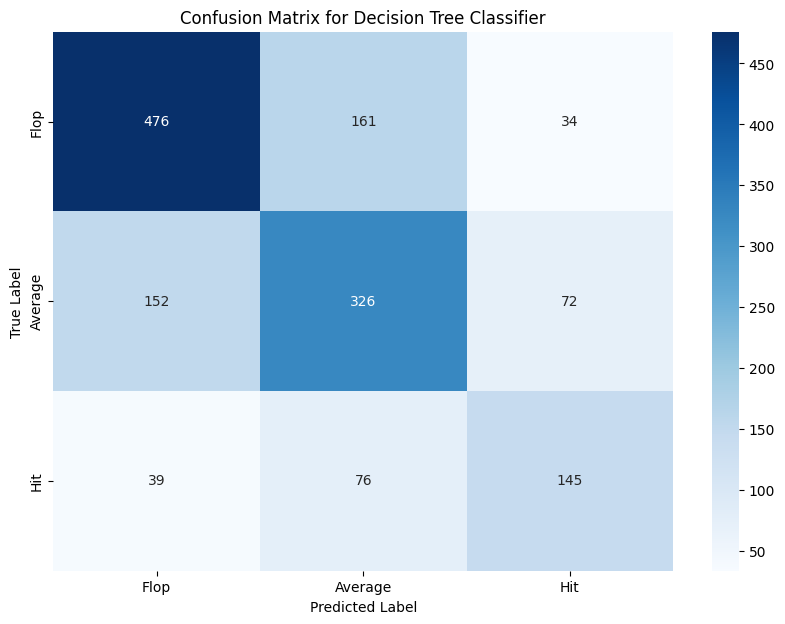

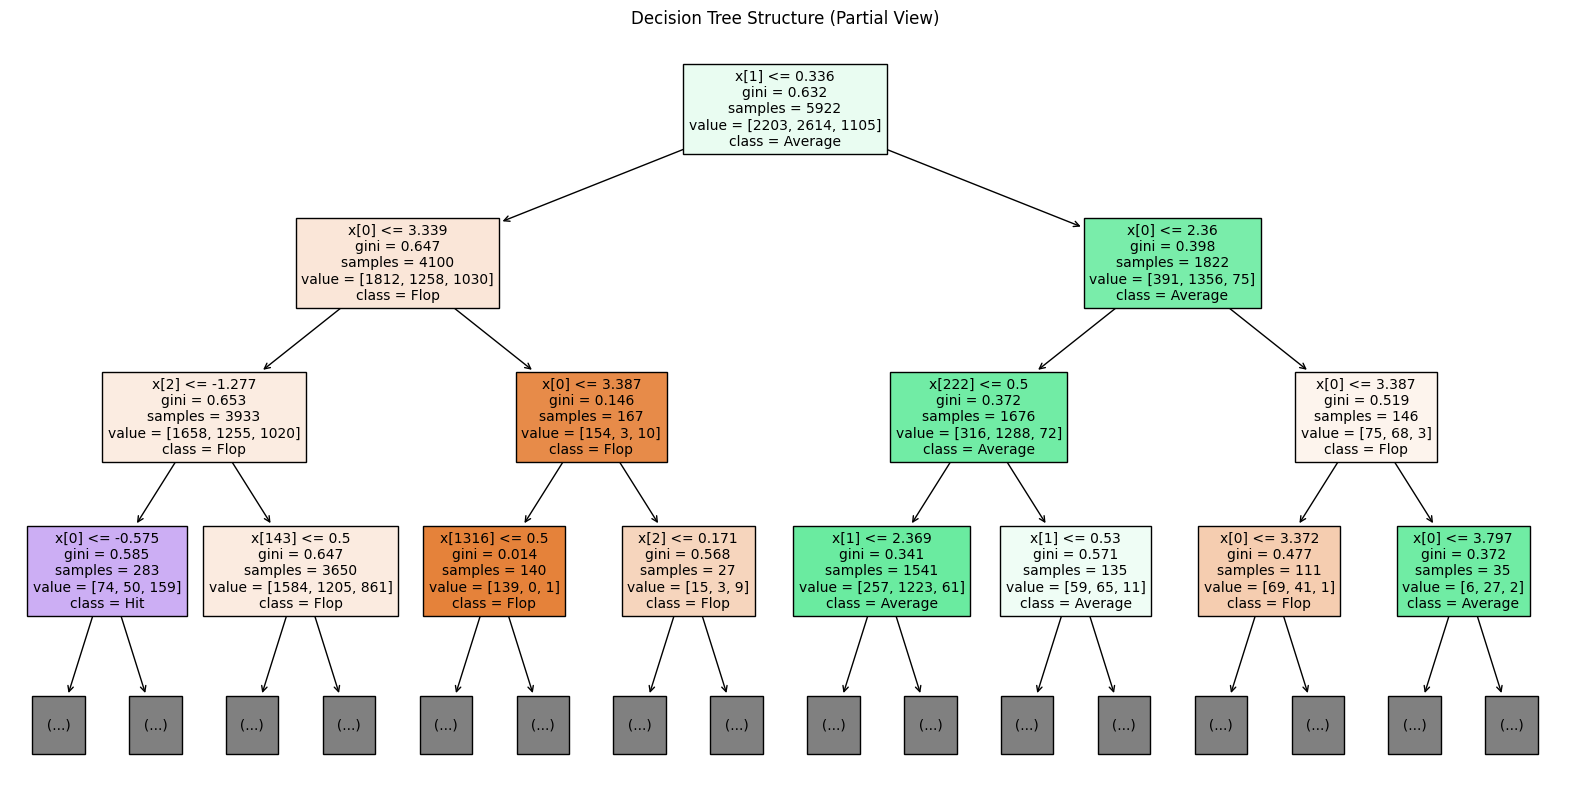

In [ ]:

from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', DecisionTreeClassifier(random_state=42))])

dt_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)


print(f'Accuracy: {accuracy_score(y_test, y_pred_dt)}')
print(confusion_matrix(y_test, y_pred))

print('Decision Tree Classifier Metrics:')
print(classification_report(y_test, y_pred_dt))

print(f'Accuracy: {accuracy_score(y_test, y_pred_dt)}')


conf_matrix_dt = confusion_matrix(y_test, y_pred_dt, labels=['Flop', 'Average', 'Hit'])
print(conf_matrix_dt)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap='Blues', xticklabels=['Flop', 'Average', 'Hit'], yticklabels=['Flop', 'Average', 'Hit'])
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


plt.figure(figsize=(20, 10))
plot_tree(dt_pipeline.named_steps['classifier'], max_depth=3, filled=True, class_names=['Flop', 'Average', 'Hit'], fontsize=10)
plt.title('Decision Tree Structure (Partial View)')
plt.show()

## Gradient Boosting Classifier model on the data .

Gradient Boosting Classifier Metrics:
              precision    recall  f1-score   support

     Average       0.53      0.68      0.59       550
        Flop       0.72      0.69      0.70       671
         Hit       0.68      0.32      0.43       260

    accuracy                           0.62      1481
   macro avg       0.64      0.56      0.58      1481
weighted avg       0.64      0.62      0.62      1481

Accuracy: 0.6218771100607697
[[465 196  10]
 [148 373  29]
 [ 36 141  83]]


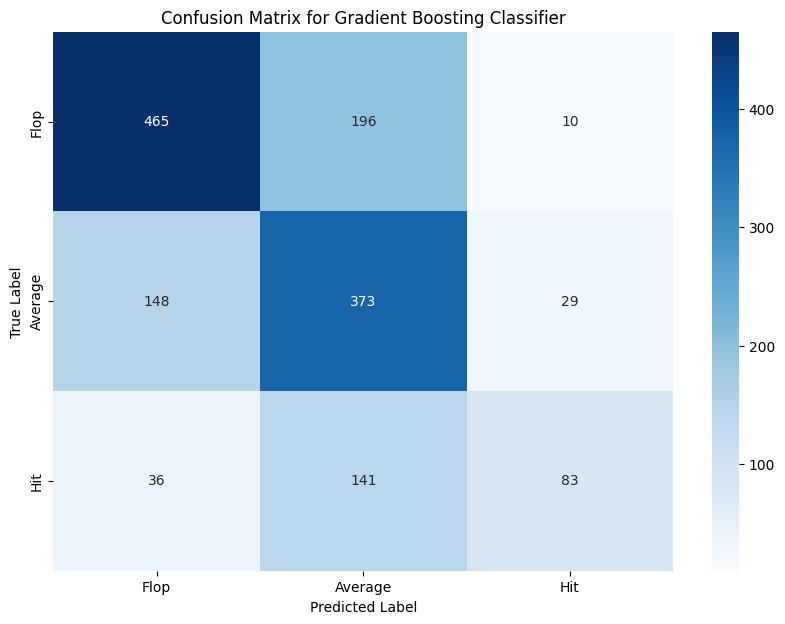

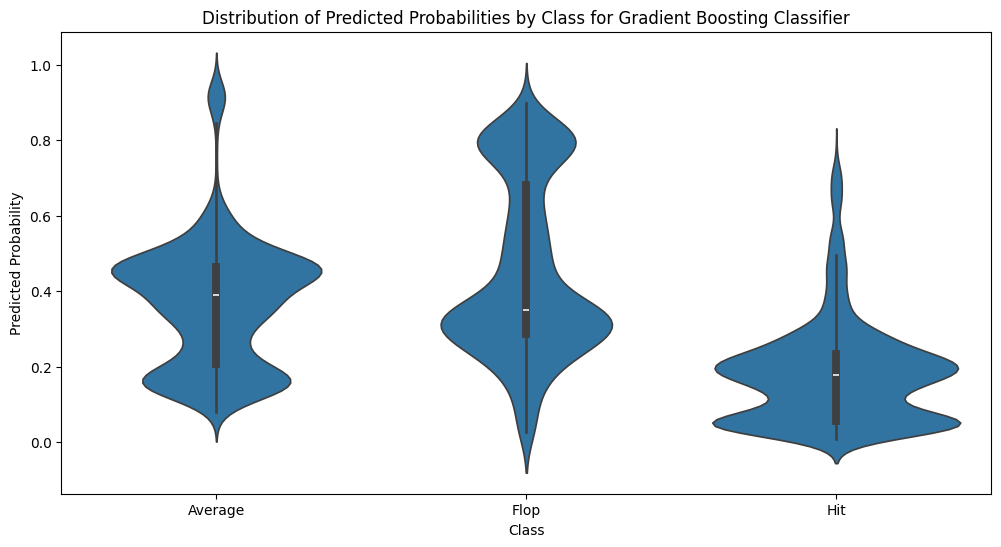

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier(random_state=42))])

gb_pipeline.fit(X_train, y_train)
y_pred_gb = gb_pipeline.predict(X_test)


print('Gradient Boosting Classifier Metrics:')
print(classification_report(y_test, y_pred_gb))

print(f'Accuracy: {accuracy_score(y_test, y_pred_gb)}')


conf_matrix_gb = confusion_matrix(y_test, y_pred_gb, labels=['Flop', 'Average', 'Hit'])
print(conf_matrix_gb)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap='Blues', xticklabels=['Flop', 'Average', 'Hit'], yticklabels=['Flop', 'Average', 'Hit'])
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

y_pred_prob_gb = gb_pipeline.predict_proba(X_test)


prob_df = pd.DataFrame(y_pred_prob_gb, columns=gb_pipeline.named_steps['classifier'].classes_)


prob_df_melted = prob_df.melt(var_name='Class', value_name='Probability')

plt.figure(figsize=(12, 6))
sns.violinplot(x='Class', y='Probability', data=prob_df_melted)
plt.title('Distribution of Predicted Probabilities by Class for Gradient Boosting Classifier')
plt.xlabel('Class')
plt.ylabel('Predicted Probability')
plt.show()

## Performing the basic logistic regression on the data.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Evaluation:
              precision    recall  f1-score   support

        Flop       0.57      0.56      0.57       550
     Average       0.67      0.76      0.71       671
         Hit       0.66      0.44      0.53       260

    accuracy                           0.63      1481
   macro avg       0.63      0.59      0.60      1481
weighted avg       0.63      0.63      0.62      1481

Accuracy: 0.6299797434166104
[[508 144  19]
 [200 310  40]
 [ 55  90 115]]


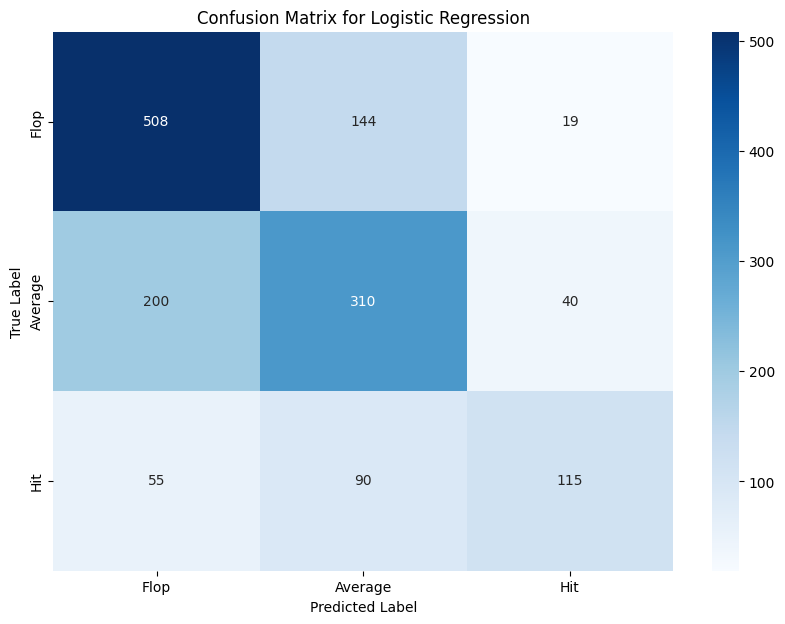

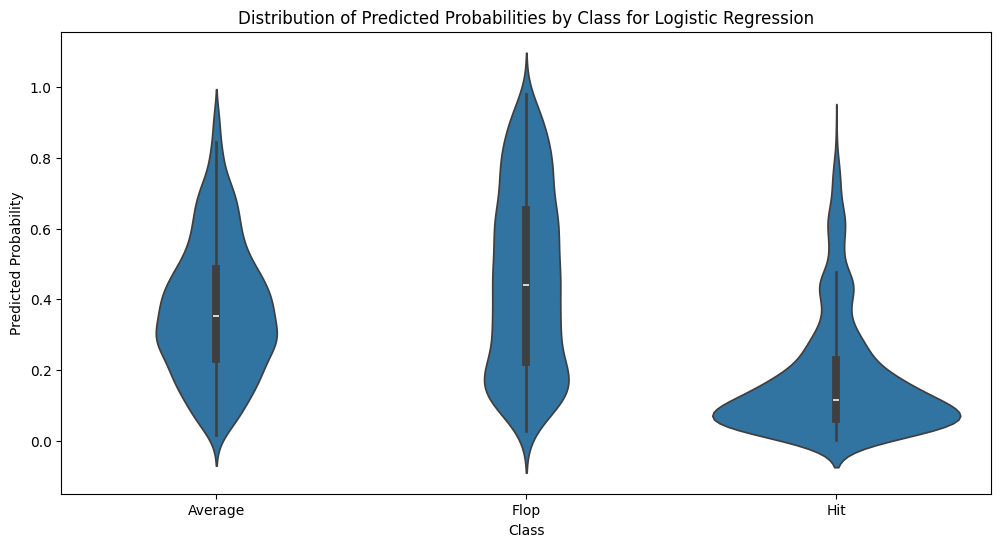

In [ ]:
from sklearn.linear_model import LogisticRegression



logistic_regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])


logistic_regression_pipeline.fit(X_train, y_train)


y_pred_logistic = logistic_regression_pipeline.predict(X_test)

print('Logistic Regression Evaluation:')
print(classification_report(y_test, y_pred_logistic, target_names=['Flop', 'Average', 'Hit']))
print(f'Accuracy: {accuracy_score(y_test, y_pred_logistic)}')
conf_matrix_lr = confusion_matrix(y_test, y_pred_logistic, labels=['Flop', 'Average', 'Hit'])
print(conf_matrix_lr)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap='Blues', xticklabels=['Flop', 'Average', 'Hit'], yticklabels=['Flop', 'Average', 'Hit'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


y_pred_prob_lr = logistic_regression_pipeline.predict_proba(X_test)
prob_df_lr = pd.DataFrame(y_pred_prob_lr, columns=logistic_regression_pipeline.named_steps['classifier'].classes_)
prob_df_melted_lr = prob_df_lr.melt(var_name='Class', value_name='Probability')

plt.figure(figsize=(12, 6))
sns.violinplot(x='Class', y='Probability', data=prob_df_melted_lr)
plt.title('Distribution of Predicted Probabilities by Class for Logistic Regression')
plt.xlabel('Class')
plt.ylabel('Predicted Probability')
plt.show()


## KNN Neighbours Classifier

K-Nearest Neighbors Evaluation:
              precision    recall  f1-score   support

        Flop       0.59      0.64      0.61       550
     Average       0.73      0.70      0.72       671
         Hit       0.64      0.58      0.61       260

    accuracy                           0.66      1481
   macro avg       0.65      0.64      0.65      1481
weighted avg       0.66      0.66      0.66      1481

Accuracy: 0.6583389601620526
[[473 165  33]
 [147 351  52]
 [ 28  81 151]]


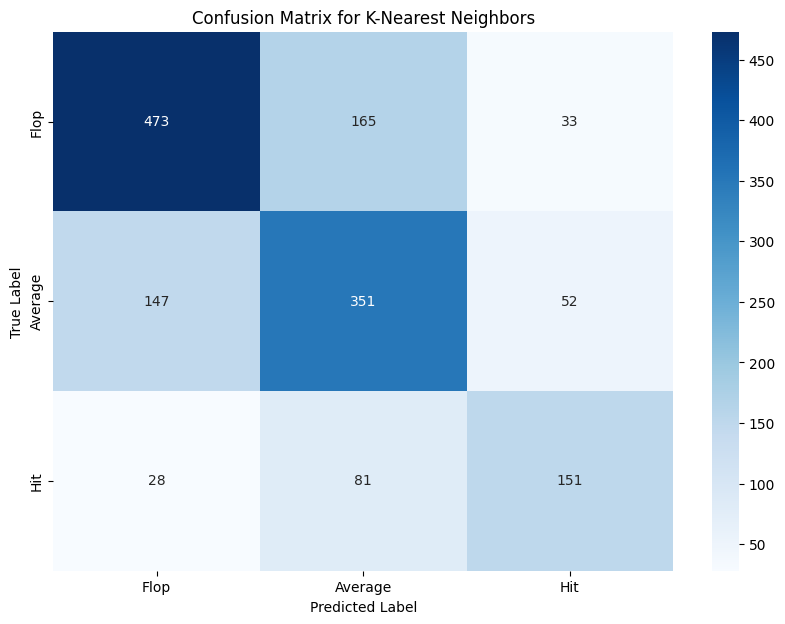

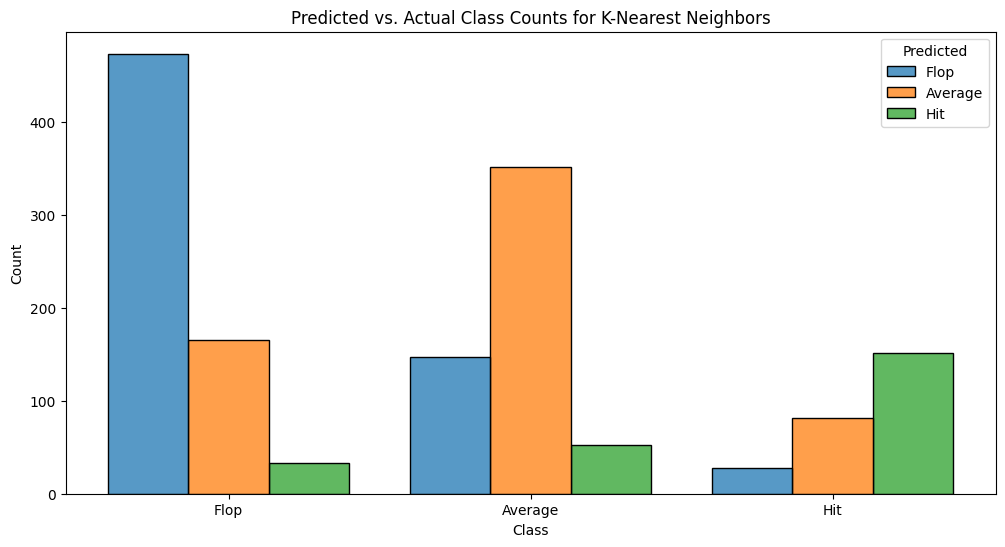

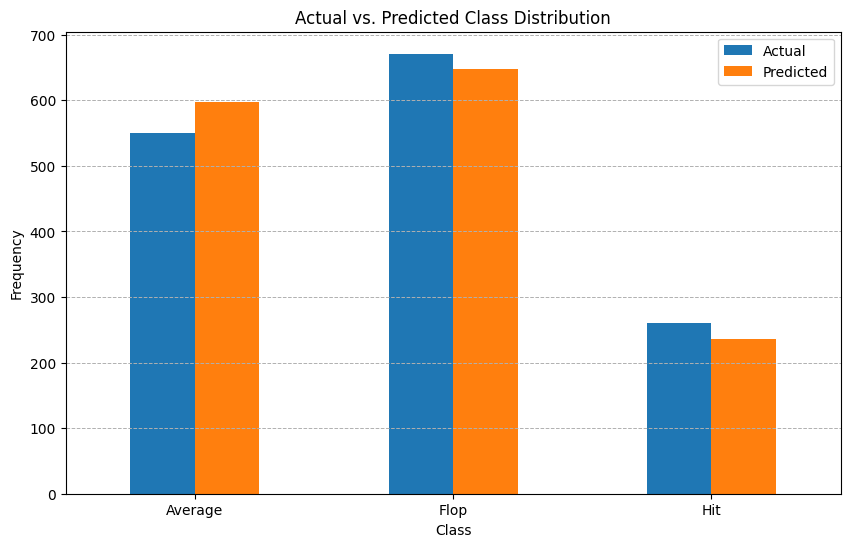

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])


knn_pipeline.fit(X_train, y_train)


y_pred_knn = knn_pipeline.predict(X_test)

print('K-Nearest Neighbors Evaluation:')
print(classification_report(y_test, y_pred_knn, target_names=['Flop', 'Average', 'Hit']))
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn)}')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn, labels=['Flop', 'Average', 'Hit'])
print(conf_matrix_knn)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap='Blues', xticklabels=['Flop', 'Average', 'Hit'], yticklabels=['Flop', 'Average', 'Hit'])
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn}), x='Actual', hue='Predicted', multiple="dodge", shrink=.8)
plt.title('Predicted vs. Actual Class Counts for K-Nearest Neighbors')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


df_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})


class_distribution_actual = df_comparison['Actual'].value_counts().sort_index()
class_distribution_predicted = df_comparison['Predicted'].value_counts().sort_index()


df_plot = pd.DataFrame({'Actual': class_distribution_actual, 'Predicted': class_distribution_predicted})


df_plot.plot(kind='bar', figsize=(10, 6))
plt.title('Actual vs. Predicted Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend(loc='best')
plt.show()

## Single Vector Classifier

Support Vector Machine Evaluation:
              precision    recall  f1-score   support

        Flop       0.57      0.62      0.59       550
     Average       0.69      0.73      0.71       671
         Hit       0.67      0.45      0.53       260

    accuracy                           0.64      1481
   macro avg       0.64      0.60      0.61      1481
weighted avg       0.64      0.64      0.64      1481

Accuracy: 0.6401080351114112
[[490 160  21]
 [171 342  37]
 [ 45  99 116]]


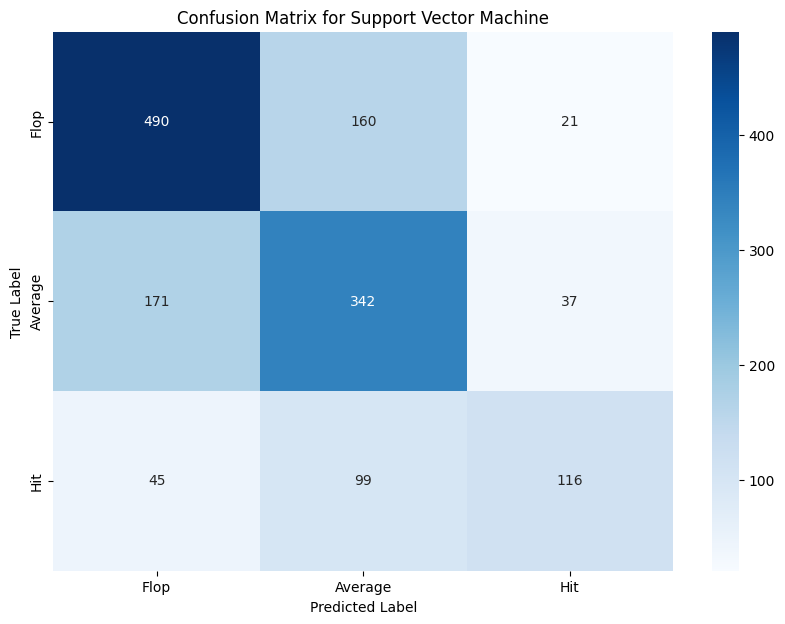

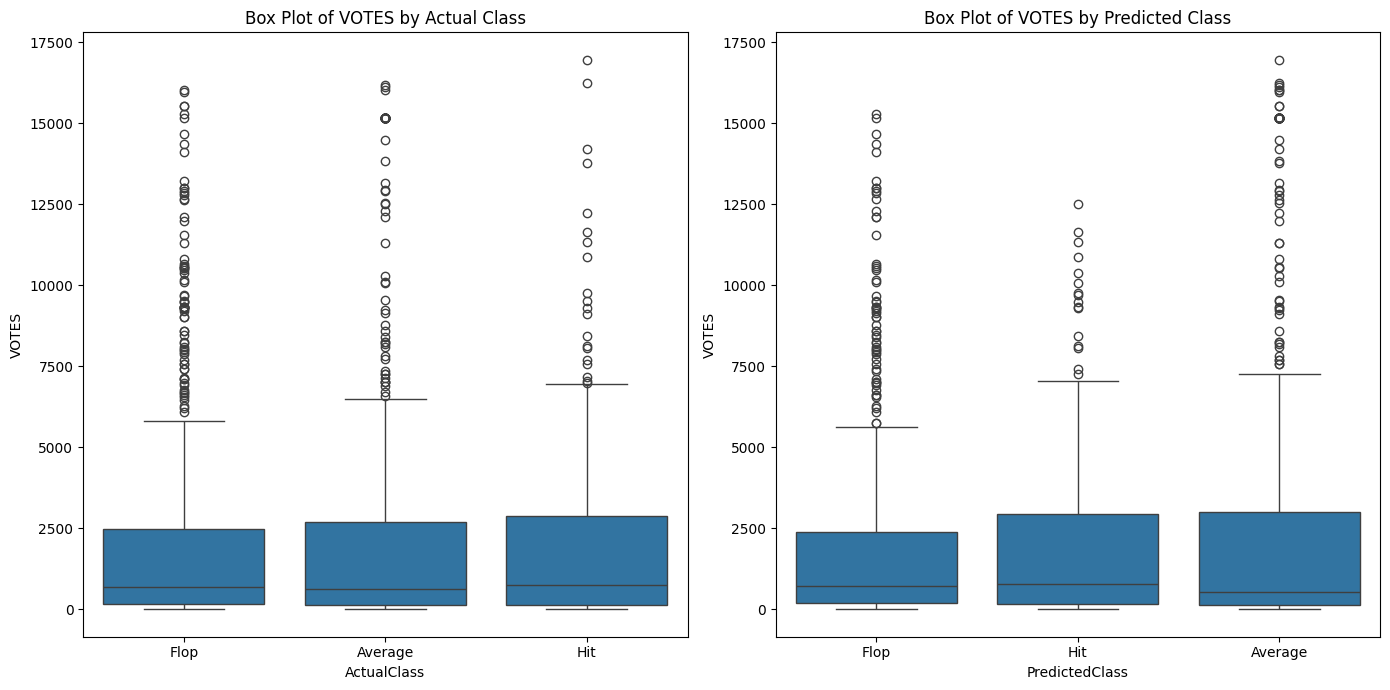

In [ ]:
from sklearn.svm import SVC


svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])


svm_pipeline.fit(X_train, y_train)


y_pred_svm = svm_pipeline.predict(X_test)

print('Support Vector Machine Evaluation:')
print(classification_report(y_test, y_pred_svm, target_names=['Flop', 'Average', 'Hit']))
print(f'Accuracy: {accuracy_score(y_test, y_pred_svm)}')
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm, labels=['Flop', 'Average', 'Hit'])
print(conf_matrix_svm)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap='Blues', xticklabels=['Flop', 'Average', 'Hit'], yticklabels=['Flop', 'Average', 'Hit'])
plt.title('Confusion Matrix for Support Vector Machine')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

X_test_vis = pd.DataFrame(X_test).copy()
X_test_vis['ActualClass'] = y_test
X_test_vis['PredictedClass'] = y_pred_svm


plt.figure(figsize=(14, 7))


plt.subplot(1, 2, 1)
sns.boxplot(x='ActualClass', y='VOTES', data=X_test_vis)
plt.title('Box Plot of VOTES by Actual Class')


plt.subplot(1, 2, 2)
sns.boxplot(x='PredictedClass', y='VOTES', data=X_test_vis)
plt.title('Box Plot of VOTES by Predicted Class')

plt.tight_layout()
plt.show()

# Un Supervised Learning Algorithms

## K - means Clustering

Silhouette Score for K-Means: 0.1808019894088216
Inertia for K-Means: 30783.900867871063
Homogeneity Score for K-Means: 0.07714802314421625
Completeness Score for K-Means: 0.09215586749940531
V-Measure Score for K-Means: 0.08398676452964667


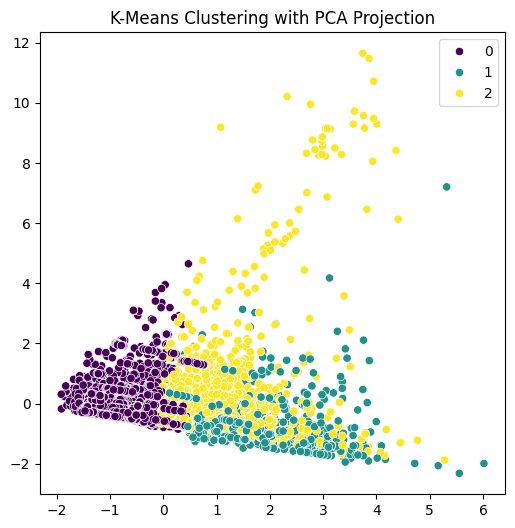

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score


kmeans = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_preprocessed)
labels_kmeans = kmeans.labels_

y_true = df['RATING']


silhouette_kmeans = silhouette_score(X_preprocessed, labels_kmeans)
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')

inertia_kmeans = kmeans.inertia_
print(f'Inertia for K-Means: {inertia_kmeans}')

homogeneity = homogeneity_score(y_true, labels_kmeans)
print(f'Homogeneity Score for K-Means: {homogeneity}')

completeness = completeness_score(y_true, labels_kmeans)
print(f'Completeness Score for K-Means: {completeness}')

v_measure = v_measure_score(y_true, labels_kmeans)
print(f'V-Measure Score for K-Means: {v_measure}')


pca = PCA(n_components=2)

X_dense = X_preprocessed.toarray() if hasattr(X_preprocessed, "toarray") else X_preprocessed
X_pca = pca.fit_transform(X_dense)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_kmeans, palette='viridis', legend='full')
plt.title('K-Means Clustering with PCA Projection')
plt.show()

## DBSCAN Algorithm

Silhouette Score for DBSCAN: 0.4931763106146411
Number of clusters found by DBSCAN: 28
Number of noise points found by DBSCAN: 6986


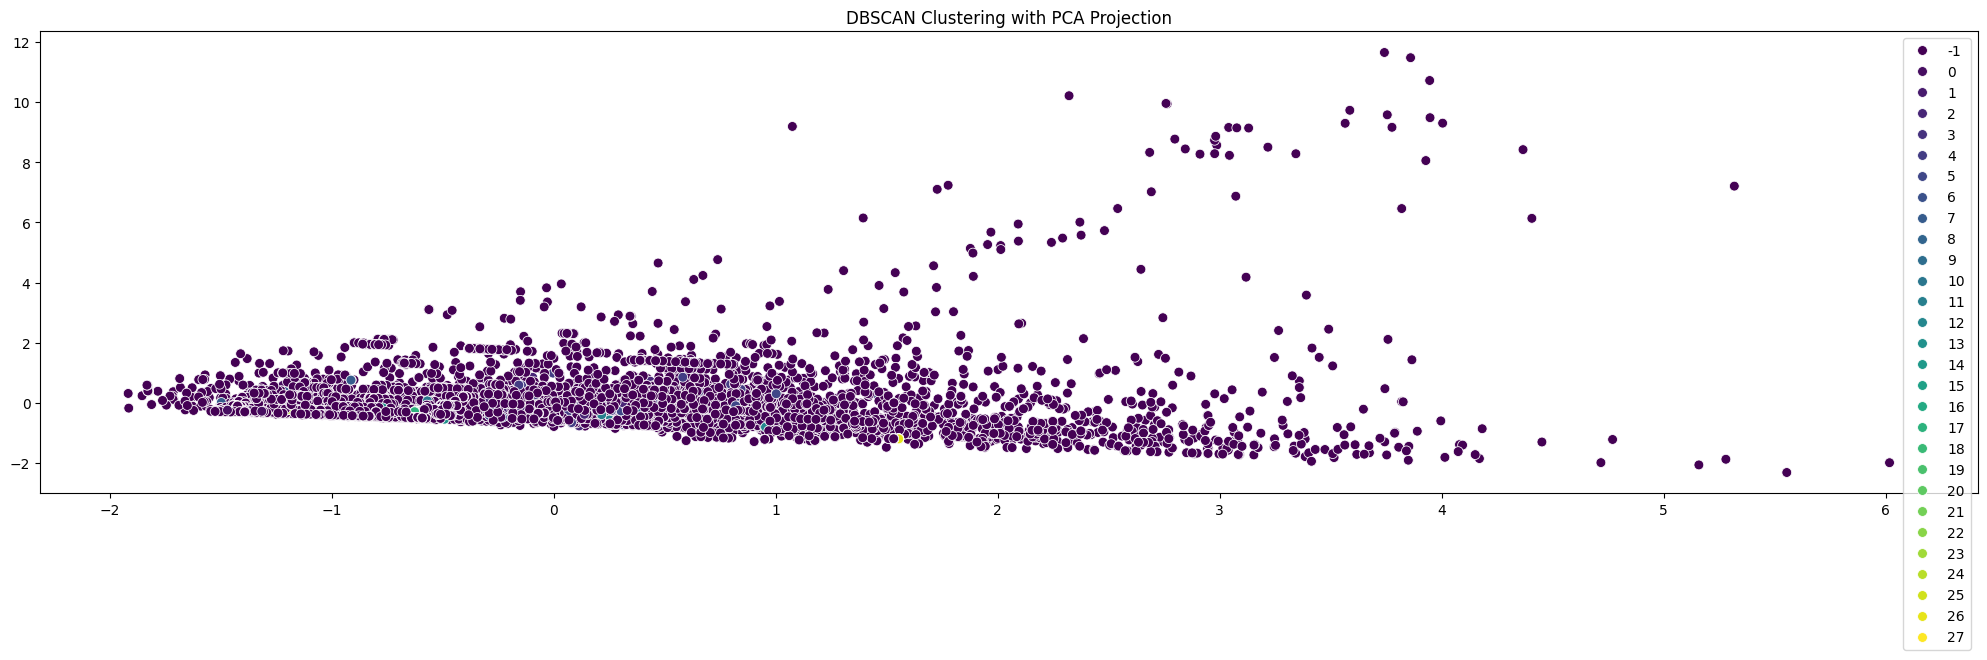

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score



dbscan = DBSCAN().fit(X_preprocessed)
labels_dbscan = dbscan.labels_


silhouette_dbscan = silhouette_score(X_preprocessed[labels_dbscan != -1], labels_dbscan[labels_dbscan != -1])
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')

n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise_points_dbscan = list(labels_dbscan).count(-1)

print(f'Number of clusters found by DBSCAN: {n_clusters_dbscan}')
print(f'Number of noise points found by DBSCAN: {n_noise_points_dbscan}')



plt.figure(figsize=(25, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_dbscan, palette='viridis', legend='full', s=50)
plt.title('DBSCAN Clustering with PCA Projection')
plt.show()

In [ ]:
df2.head()

,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
6,2021.00,"drama,romance",6.80,a pair of interwoven stories set in the past a...,director augustine frizzell stars shailene woo...,5283.00,110.00
13,2021.00,"comedy,drama,romance",5.40,a suburban mother of two takes a fantasycharge...,stars sarah shahi mike vogel adam demos margar...,12172.00,60.00
25,2021.00,"drama,history,romance",5.00,a story about a heroic fireman who worked as o...,director danila kozlovskiy stars danila kozlov...,4681.00,136.00
63,2021.00,"action,comedy",5.40,a mysterious former secret service agent must ...,director david charhon stars jeanclaude van da...,2606.00,110.00
64,2021.00,"comedy,romance",5.70,erica who ends up as the entertainment at her ...,director steven k tsuchida stars christina mil...,1591.00,101.00


# Regression tasks on the data .

## Train - test and split of the data frame

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns



X = df2.drop('RATING', axis=1)
y = df2['RATING']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numeric_features = ['VOTES', 'RunTime','YEAR']
categorical_features = ['GENRE','ONE-LINE','STARS']


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])




## Linear Regression

Mean Squared Error:  13.973281347427594
R2 Score:  -8.99976297878093
Mean Absolute Error:  2.274850001642607


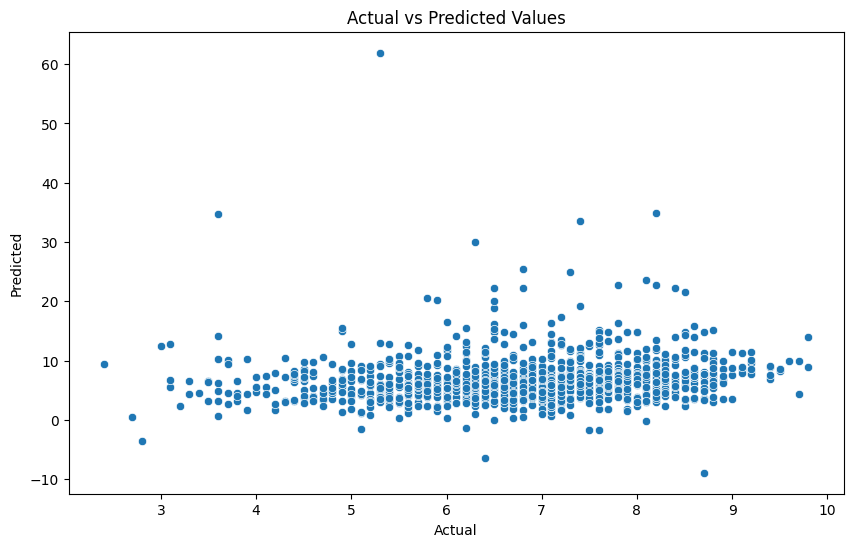

<ipython-input-617-0c7c9681e684>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred)


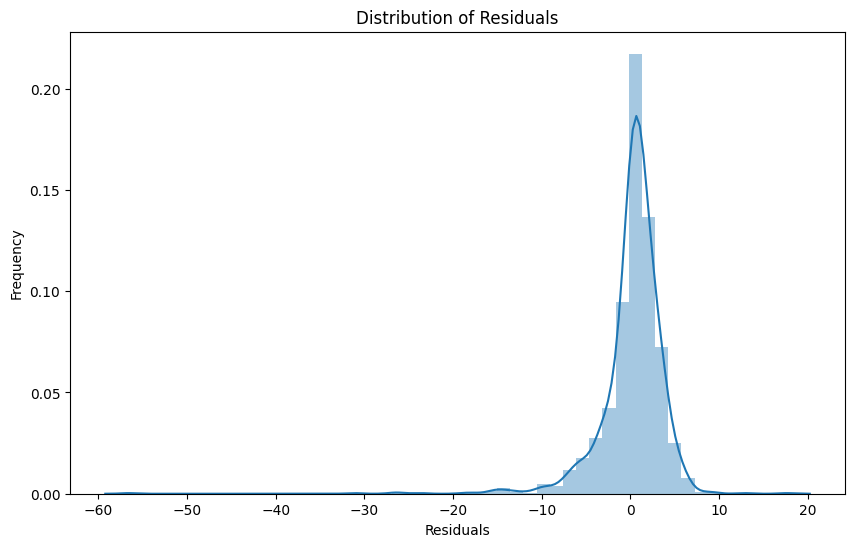

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns


lr = Pipeline(steps=[('preprocessor', preprocessor),
                     ('regressor', LinearRegression())])

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))


plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


plt.figure(figsize=(10,6))
sns.distplot(y_test - y_pred)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


## K Nearest Neighbours Regressor

Mean Squared Error:  0.8099837947332883
R2 Score:  0.4203476075089886
Mean Absolute Error:  0.642255232950709


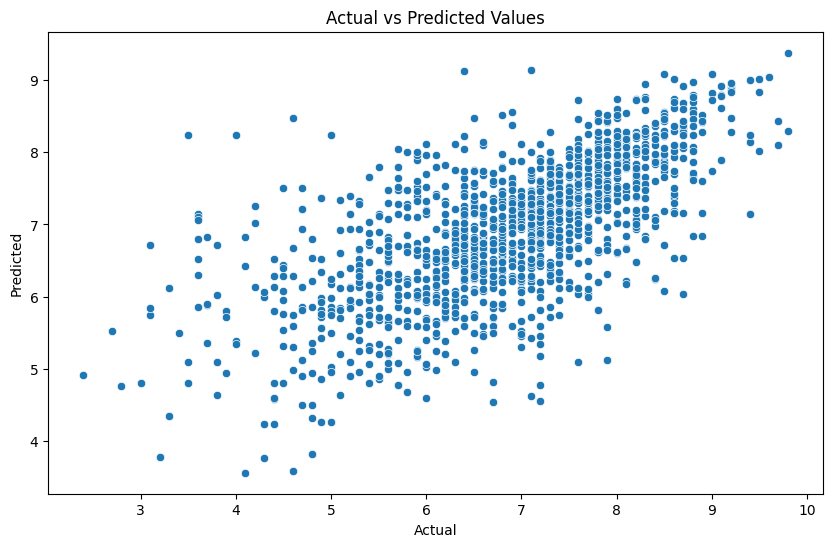

<ipython-input-618-e9ead75c8223>:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred)


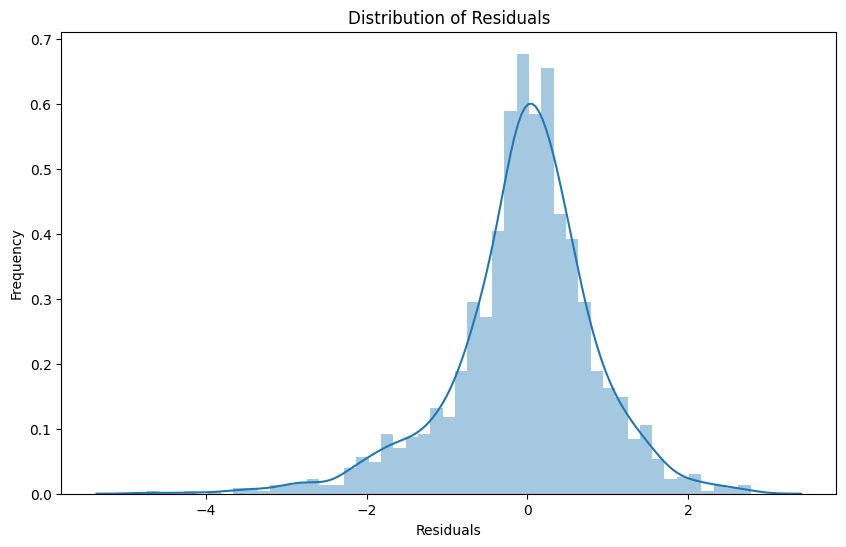

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


knn = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', KNeighborsRegressor(n_neighbors=5))])

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


# Evaluation Metrics
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

# Visualization - Actual vs. Predicted
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Visualization - Residual Distribution
plt.figure(figsize=(10,6))
sns.distplot(y_test - y_pred)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

## Single Vector Regressor

Mean Squared Error:  0.9022978668694266
R2 Score:  0.354284467576763
Mean Absolute Error:  0.7163932087063964


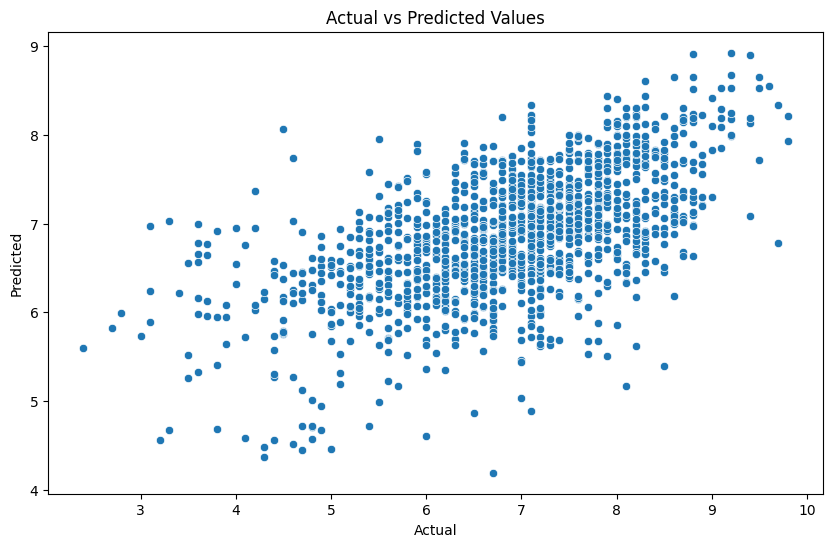

<ipython-input-619-e1ea50fe4324>:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred)


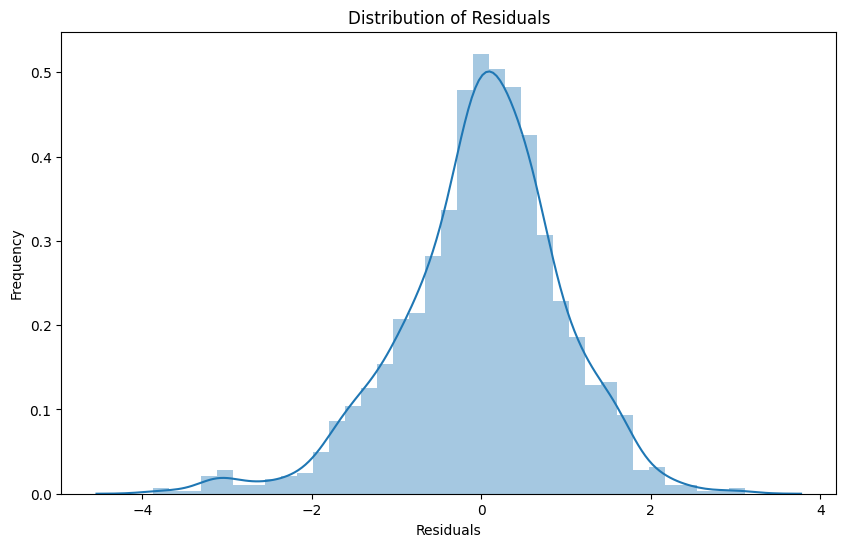

In [ ]:
from sklearn.svm import SVR


svm_reg = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', SVR(kernel='linear'))])

svm_reg.fit(X_train, y_train)
y_pred = svm_reg.predict(X_test)


print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

# Visualization - Actual vs. Predicted
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Visualization - Residual Distribution
plt.figure(figsize=(10,6))
sns.distplot(y_test - y_pred)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

## Random Forest Regressor

Random Forest Regressor
Mean Squared Error:  0.7695292876500834
R2 Score:  0.449298250682715
Mean Absolute Error:  0.6191651104466095


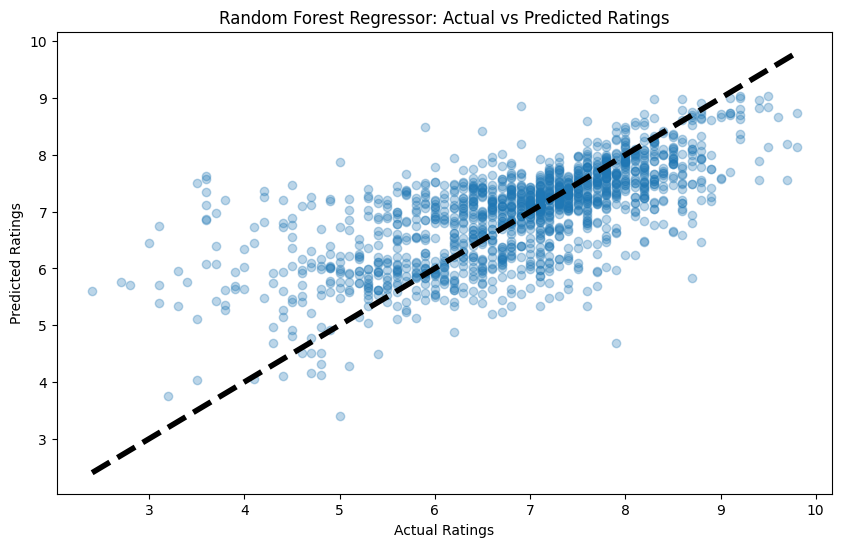

In [ ]:
from sklearn.ensemble import RandomForestRegressor


rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluation Metrics
print("Random Forest Regressor")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

# Visualization - Actual vs. Predicted
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Random Forest Regressor: Actual vs Predicted Ratings')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()


## Gradient Boosting Regressor

Gradient Boosting Regressor
Mean Squared Error:  0.9140862999262068
R2 Score:  0.3458482575321745
Mean Absolute Error:  0.7365332368765224


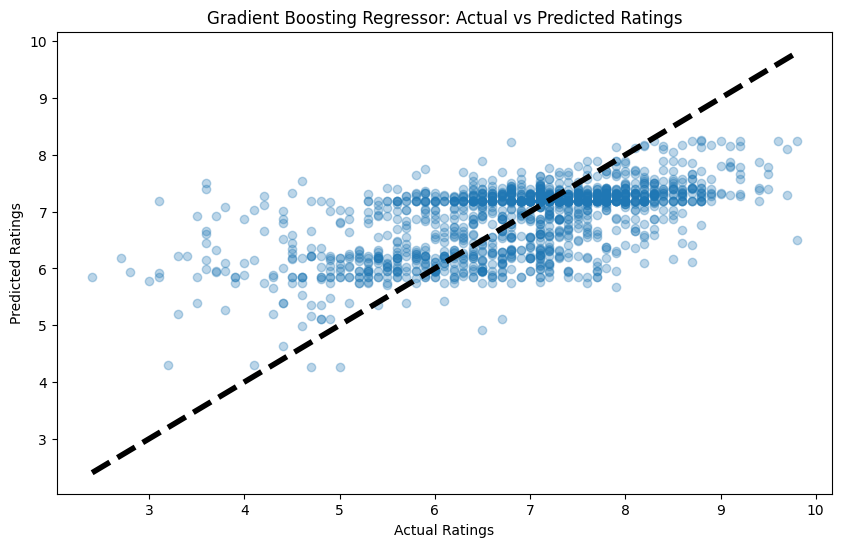

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


gb = Pipeline(steps=[('preprocessor', preprocessor),
                     ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                                             max_depth=3, random_state=42))])

gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

# Evaluation Metrics
print("Gradient Boosting Regressor")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

# Visualization - Actual vs. Predicted
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Gradient Boosting Regressor: Actual vs Predicted Ratings')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()
